In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [42]:
def load_data(path):
    df = pd.read_csv(path)
    print(df.head())
    print(df.dtypes)
    train,test=train_test_split(df,test_size=0.2,random_state=42)
    
    return train,test

In [43]:
path='/Users/rianrachmanto/pypro/data/formated_esp_data.csv'
train,test = load_data(path)

  Well_ID                 Date  Frequency     Voltage  Ampere  \
0     BC1  2023-01-01 00:00:00       60.0  432.299988    60.0   
1     BC1  2023-01-01 00:00:00       60.0  432.299988    60.0   
2     BC1  2023-01-01 01:00:00       60.0  434.799988    60.0   
3     BC1  2023-01-01 01:00:00       60.0  434.799988    60.0   
4     BC1  2023-01-01 02:00:00       60.0  431.899994    60.0   

   Pressure_Discharge  Pressure_Intake  Temp_Intake  Temp_Motor  Vibration_X  \
0                 NaN              NaN          NaN         NaN          NaN   
1                 NaN              NaN          NaN         NaN          NaN   
2                 NaN              NaN          NaN         NaN          NaN   
3                 NaN              NaN          NaN         NaN          NaN   
4                 NaN              NaN          NaN         NaN          NaN   

   Vibration_Y  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
Well_ID                obj

In [44]:
def eda(train):
    print('Train data shape',train.shape)
    print('Number of Missing Values',train.isna().sum())
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    #plotting histogram for numeric columns, one plot for each column
    for col in numeric_columns:
        plt.figure()
        sns.histplot(train[col],kde=True)
        plt.title(col)
        plt.show()
    #plotting boxplot for numeric columns, one plot for each column
    for col in numeric_columns:
        plt.figure()
        sns.boxplot(train[col])
        plt.title(col)
        plt.show()

Train data shape (173844, 11)
Number of Missing Values Well_ID                   0
Date                      0
Frequency             74394
Voltage               76331
Ampere                74394
Pressure_Discharge    40666
Pressure_Intake       40666
Temp_Intake           40666
Temp_Motor            40666
Vibration_X           55251
Vibration_Y           77120
dtype: int64


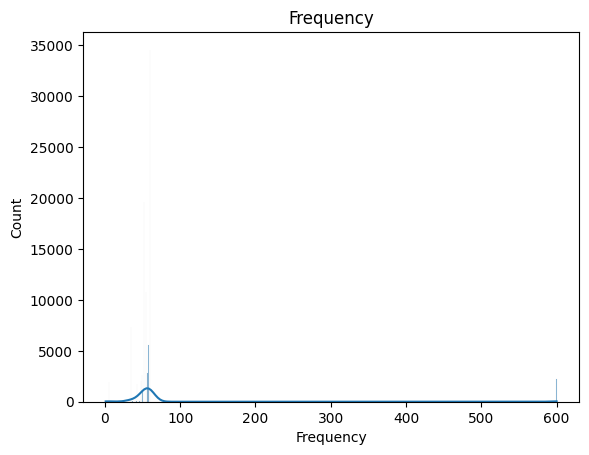

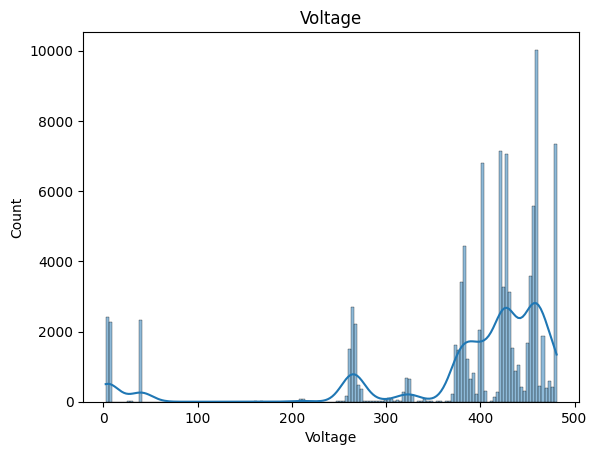

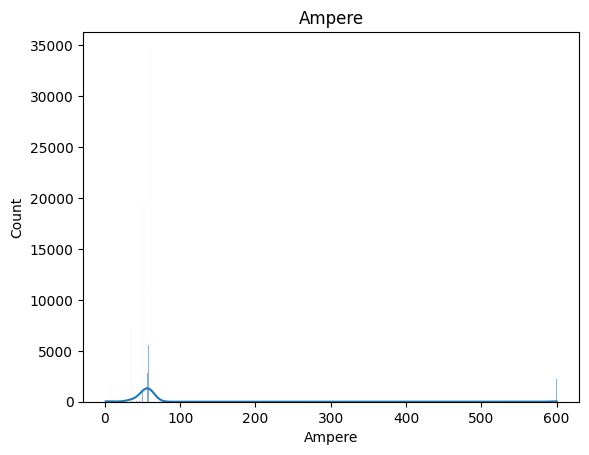

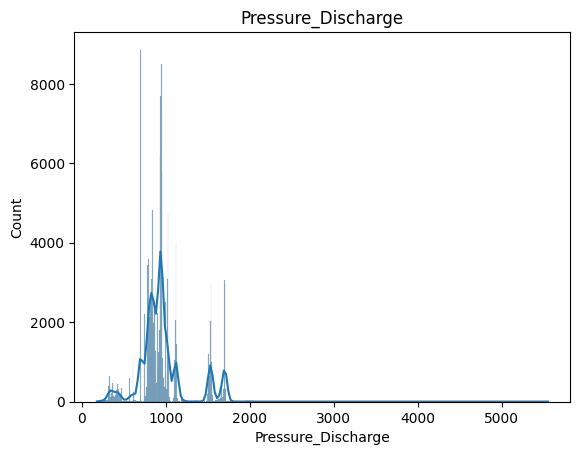

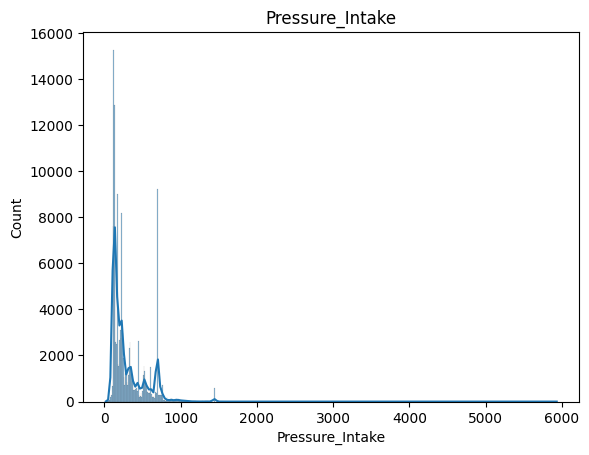

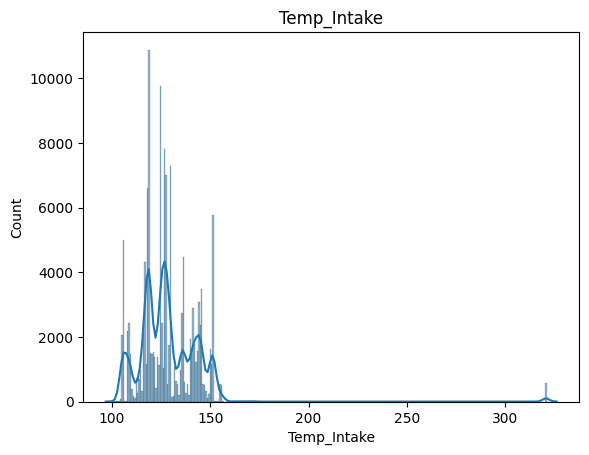

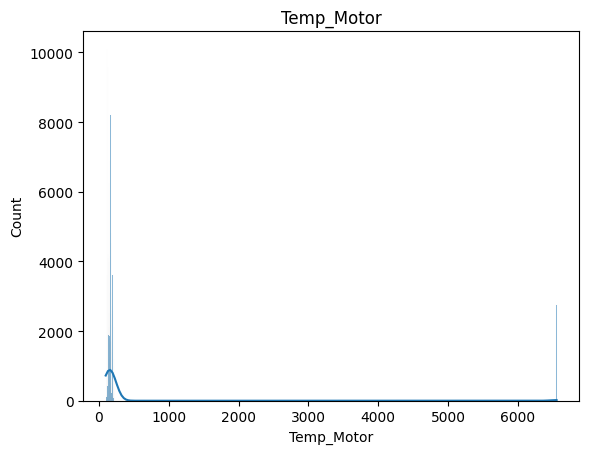

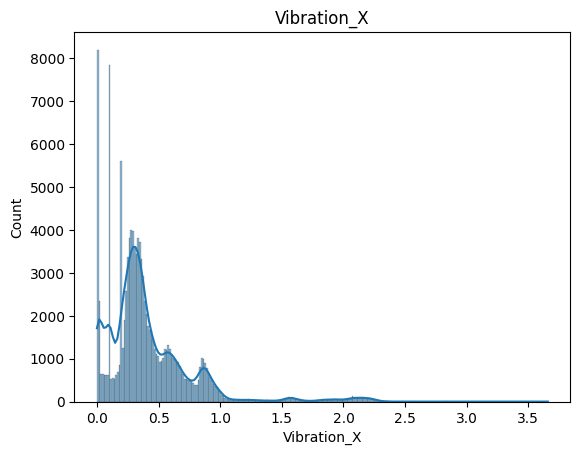

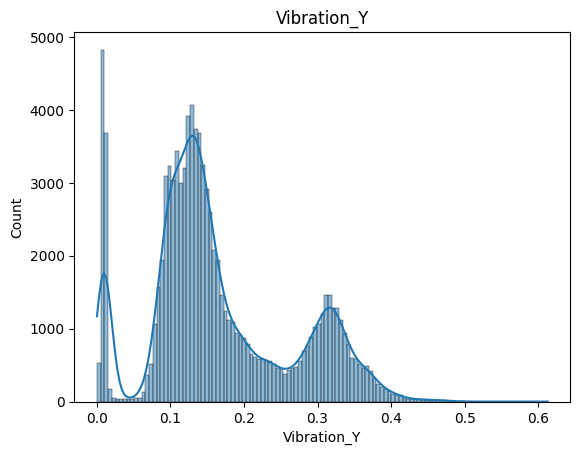

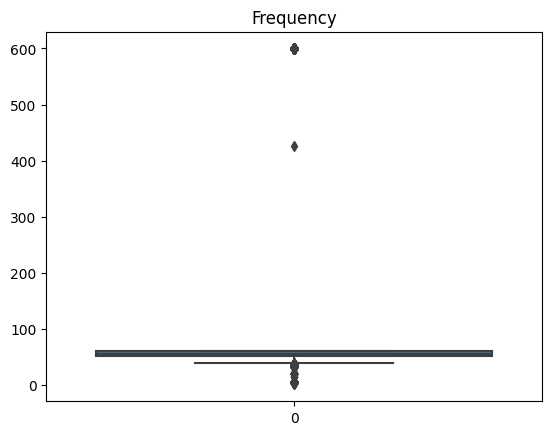

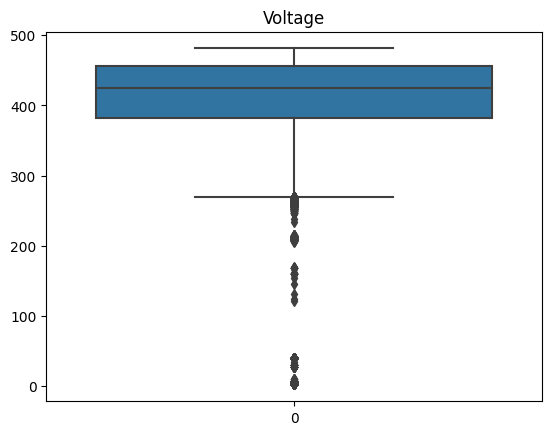

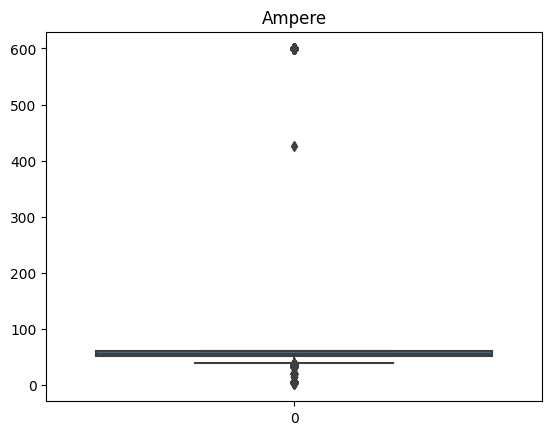

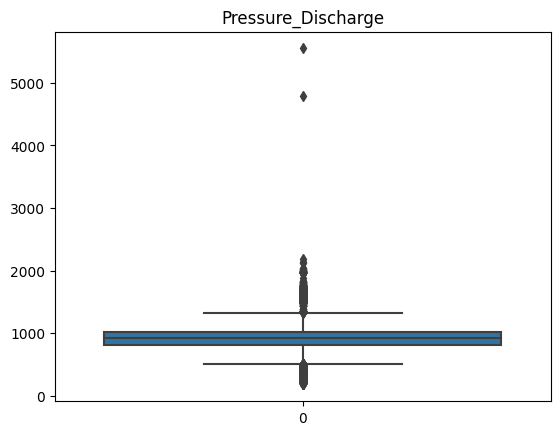

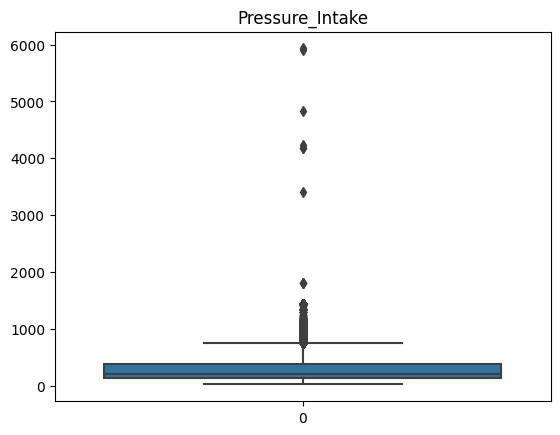

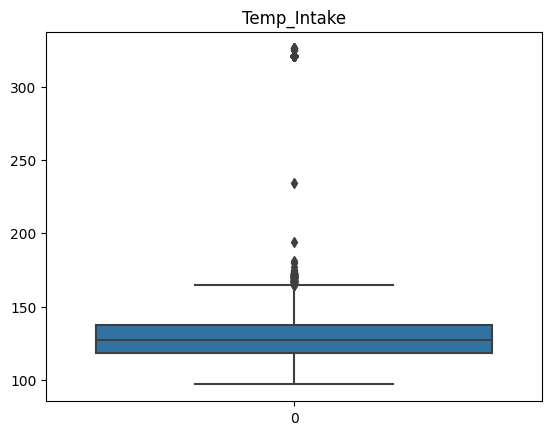

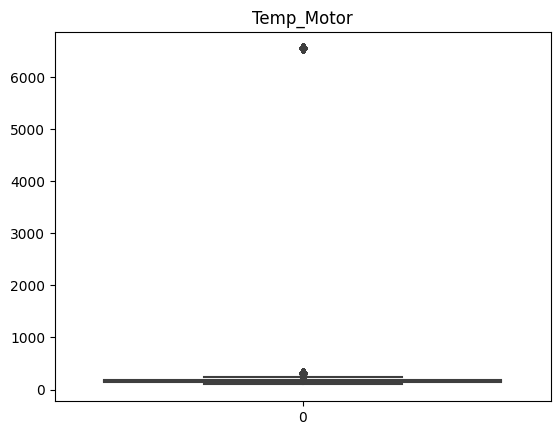

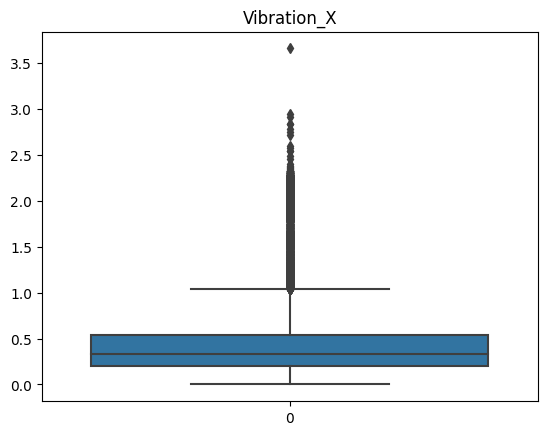

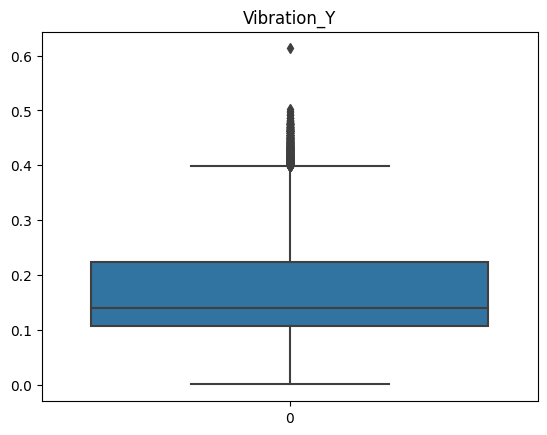

In [45]:
eda(train)

In [46]:
class data_cleaning():
    def __init__(self,train):
        self.train=train
    def clean_train(self):
        #drop missing values
        self.train.dropna(inplace=True)
        print('Train data shape after dropping missing values',self.train.shape)
        #fillna with median and mean method
        #mean_col
        #mean_col=['Frequency','Ampere','Pressure_Discharge','Temp_Intake']
        #median_col=['Voltage','Pressure_Intake','Temp_Motor','Vibration_X','Vibration_Y']
        #for col in mean_col:
            #self.train[col].fillna(self.train[col].mean(),inplace=True)
        #for col in median_col:
            #self.train[col].fillna(self.train[col].median(),inplace=True)
        # handle outliers with IQR method
        #numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge','Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
        #for col in numeric_columns:
            #Q1 = self.train[col].quantile(0.25)
            #Q3 = self.train[col].quantile(0.75)
            #IQR = Q3 - Q1
            #self.train = self.train[(self.train[col] >= (Q1 - 1.5 * IQR)) & (self.train[col] <= (Q3 + 1.5 * IQR))]
            #print('Train data shape after handling outliers',self.train.shape)
        return self.train
    
    def clean_test(self,test):
        #fillna with median and mean method
        #mean_col
        mean_col=['Frequency','Ampere','Pressure_Discharge',
                  'Temp_Intake']
        median_col=['Voltage','Pressure_Intake','Temp_Motor','Vibration_X','Vibration_Y']
        for col in mean_col:
            test[col].fillna(test[col].mean(),inplace=True)
        for col in median_col:
            test[col].fillna(test[col].median(),inplace=True)
        return test

In [47]:
#cleaning train and test data
clean_data=data_cleaning(train)
train=clean_data.clean_train()
test=clean_data.clean_test(test)
print(train.isna().sum())
print(test.isna().sum())

Train data shape after dropping missing values (32271, 11)
Well_ID               0
Date                  0
Frequency             0
Voltage               0
Ampere                0
Pressure_Discharge    0
Pressure_Intake       0
Temp_Intake           0
Temp_Motor            0
Vibration_X           0
Vibration_Y           0
dtype: int64
Well_ID               0
Date                  0
Frequency             0
Voltage               0
Ampere                0
Pressure_Discharge    0
Pressure_Intake       0
Temp_Intake           0
Temp_Motor            0
Vibration_X           0
Vibration_Y           0
dtype: int64


In [48]:
def preprocess (train):
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
        #standardize the data
    scaler=StandardScaler()
    train_scaled=scaler.fit_transform(train[numeric_columns])
    train_scaled=pd.DataFrame(train_scaled,columns=numeric_columns)
    return train_scaled

In [49]:
train_scaled=preprocess(train)

In [50]:
def apply_pca(train_scaled, feature_names, visualize=False):
    # Apply PCA with 3 components
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(train_scaled)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
    print('Explained Variance Ratio:', pca.explained_variance_ratio_)
    
    # Extract and display loadings
    loadings = pca.components_.T
    loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=feature_names)
    print("Loadings:\n", loadings_df)
    
    if visualize:
        # Visualization: PCA Biplot for PC1 and PC2
        plt.figure(figsize=(10, 7))
        plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.3)  # Plotting data points
        
        # Adding feature vectors for PC1 and PC2
        for i, v in enumerate(loadings):
            plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
            plt.text(v[0]*1.2, v[1]*1.2, feature_names[i], color='black')
        
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("PCA Biplot with Loadings (PC1 vs PC2)")
        plt.grid(True)
        plt.axis('equal')  # Equal scaling for both axes
        plt.show()
    
    return principalDf

# Usage example, assuming 'data_scaled' is your standardized data and 'feature_names' are column names
# train_scaled = scaler.fit_transform(data)  # Assuming the data has already been scaled
# apply_pca(train_scaled, data.columns, visualize=True)


Explained Variance Ratio: [0.35073507 0.23130572 0.12217718]
Loadings:
                          PC1       PC2       PC3
Frequency          -0.454709 -0.289544 -0.331400
Voltage            -0.210108 -0.348170  0.141636
Ampere             -0.454709 -0.289544 -0.331400
Pressure_Discharge  0.319680 -0.329290  0.179428
Pressure_Intake     0.353513 -0.332712 -0.274110
Temp_Intake         0.355661 -0.337831  0.014045
Temp_Motor          0.330641 -0.371492 -0.155700
Vibration_X        -0.180743 -0.164538  0.760945
Vibration_Y        -0.216059 -0.461268  0.222438


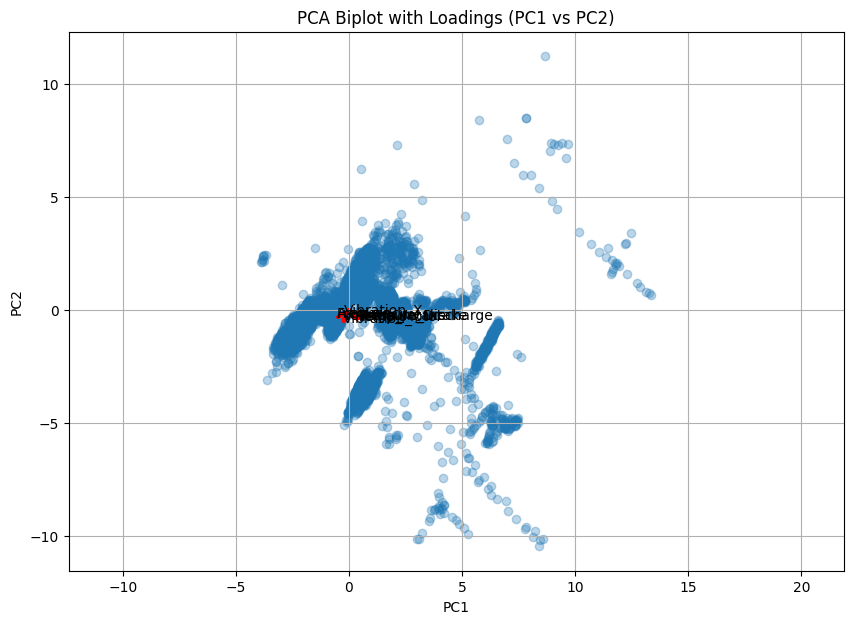

In [51]:
principalDF=apply_pca(train_scaled,train_scaled.columns,visualize=True)

In [52]:
# Assuming principalComponents is your PCA result with the necessary components
def make_cluster(principalDF):
    # Assuming principalDF is a DataFrame with PCA results
    kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust the number of clusters as necessary
    clusters = kmeans.fit_predict(principalDF[['PC1', 'PC2', 'PC3']])  # Use all available principal components

    # Plot the clusters
    plt.scatter(principalDF['PC1'], principalDF['PC2'], c=clusters, cmap='viridis')  # Plot based on PC1 and PC2 for visualization
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Cluster centers
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Clusters')
    plt.show()

    # Return the DataFrame with clusters
    principalDF['cluster'] = clusters
    return principalDF

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


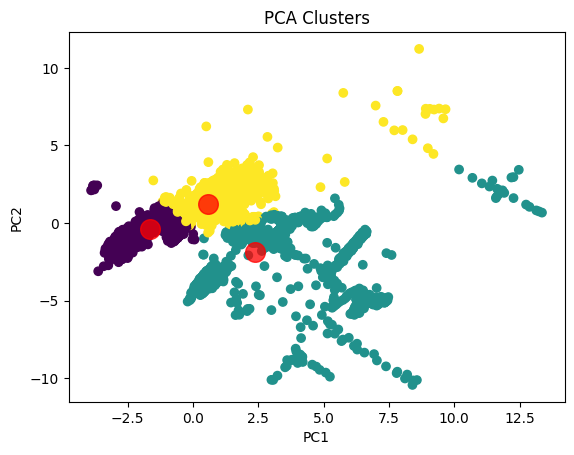

In [53]:
principalDF=make_cluster(principalDF)

In [54]:
print(principalDF)

            PC1       PC2       PC3  cluster
0      3.181516 -0.802620  0.172019        1
1      0.660879  2.058373 -0.158828        2
2      0.902116  0.708480 -0.914695        2
3     -0.521318 -0.828772 -0.735723        0
4     -1.684163 -0.039394 -0.450731        0
...         ...       ...       ...      ...
32266  0.610094  1.264227 -1.362239        2
32267 -2.089833 -0.289842 -0.301936        0
32268  0.270049  1.383758  0.044251        2
32269 -1.656091 -0.037410 -0.453981        0
32270 -0.842869 -0.255717 -0.737275        0

[32271 rows x 4 columns]


In [55]:
dict_data_tab0 = {
    'BC1': 'BC1', 'BS3': 'BS3', 'YNA7': 'YNA7', 'YNB8': 'YNB8', 'YNB17': 'YNB17', 'YNB28': 'YNB28',
    'YNB24': 'YNB24', 'YNC10': 'YNC10', 'YNC12': 'YNC12', 'YCA5': 'YCA5', 'YCA10': 'YCA10',
    'YCA7': 'YCA7', 'YCA8': 'YCA8', 'YNB29': 'YNB29', 'YNB30': 'YNB30', 'YCB4': 'YCB4',
    'YNB23': 'YNB23', 'YNB19': 'YNB19', 'YWB15': 'YWB15', 'YWA20': 'YWA20', 'YWA21': 'YWA21',
    'YWA23': 'YWA23', 'YWB22': 'YWB22', 'YWB19': 'YWB19', 'YCA11': 'YCA11', 'YWB14': 'YWB14',
    'YWB17': 'YWB17', 'YWB12': 'YWB12'
}

In [56]:
#plot each well_id in dict_data_tab0 where the plot is Voltage in time series
def plot_voltage(train,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        train[train['Well_ID']==key].plot(x='Date',y='Voltage')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

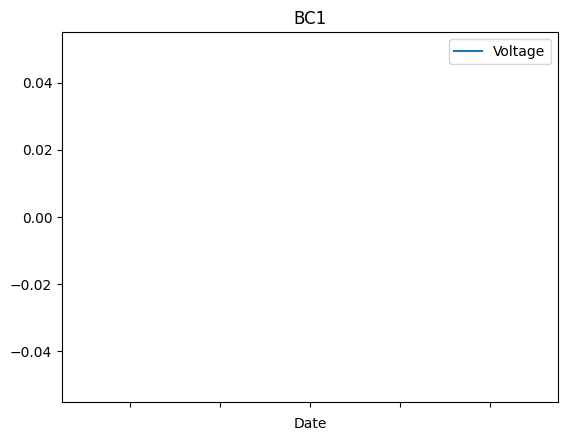

<Figure size 640x480 with 0 Axes>

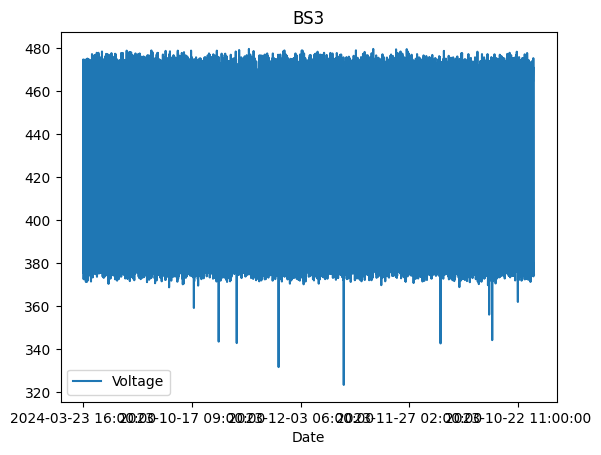

<Figure size 640x480 with 0 Axes>

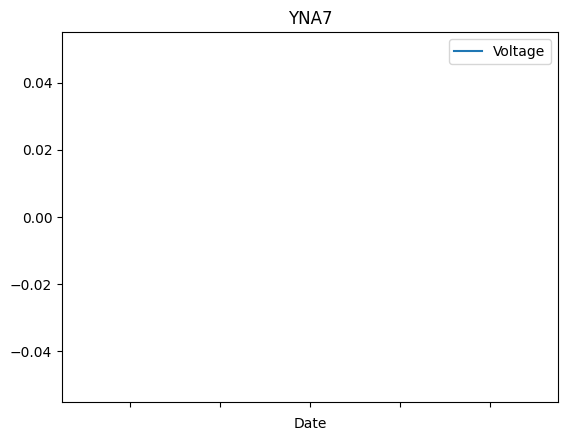

<Figure size 640x480 with 0 Axes>

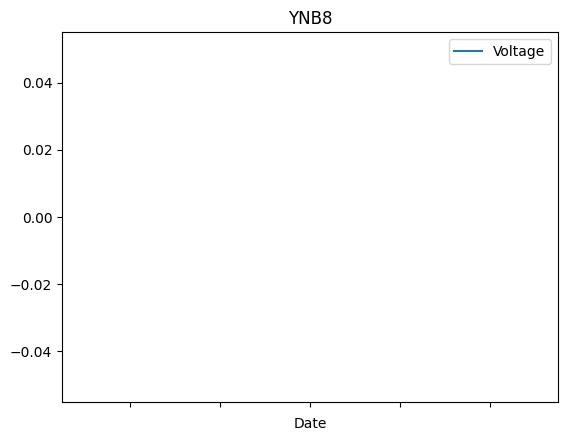

<Figure size 640x480 with 0 Axes>

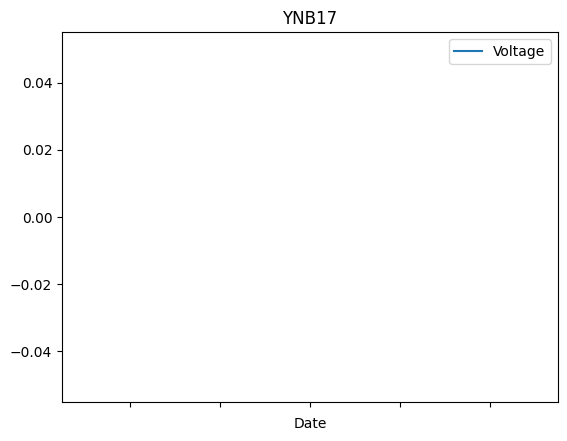

<Figure size 640x480 with 0 Axes>

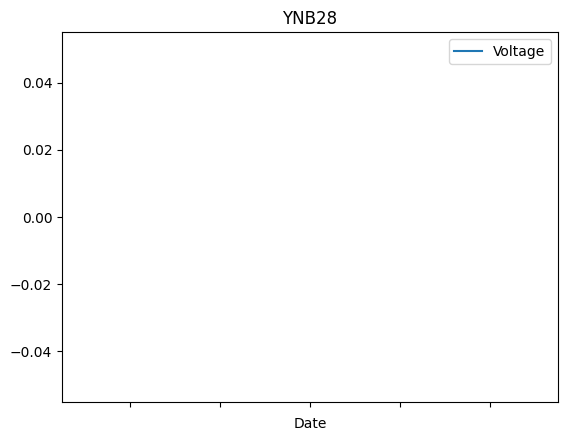

<Figure size 640x480 with 0 Axes>

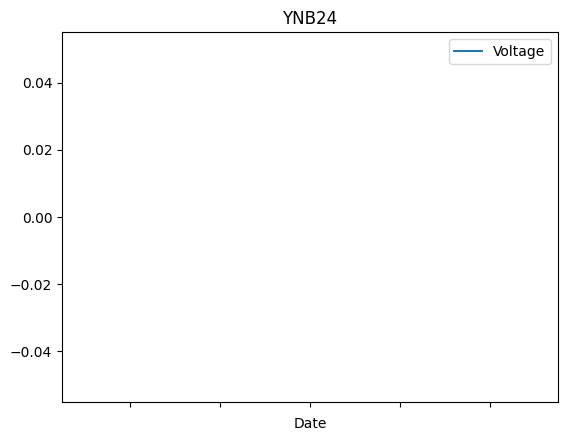

<Figure size 640x480 with 0 Axes>

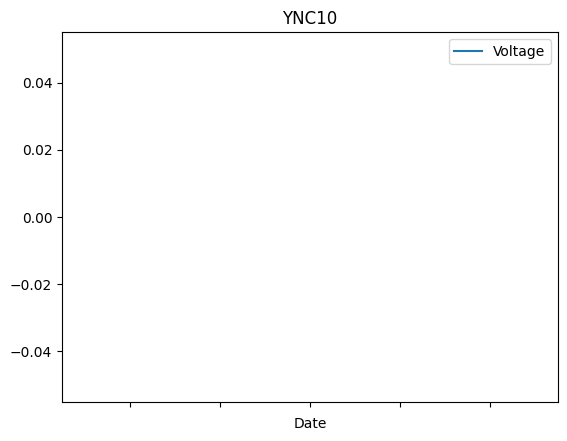

<Figure size 640x480 with 0 Axes>

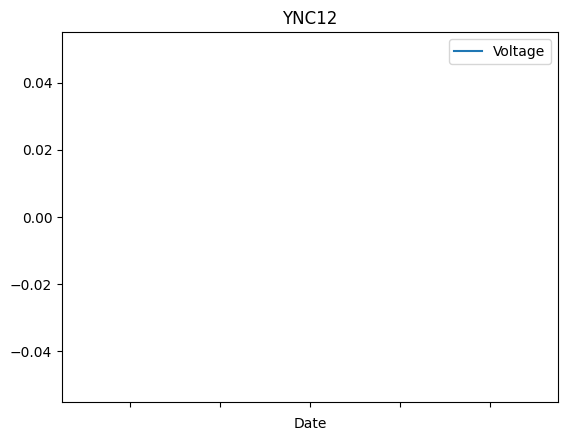

<Figure size 640x480 with 0 Axes>

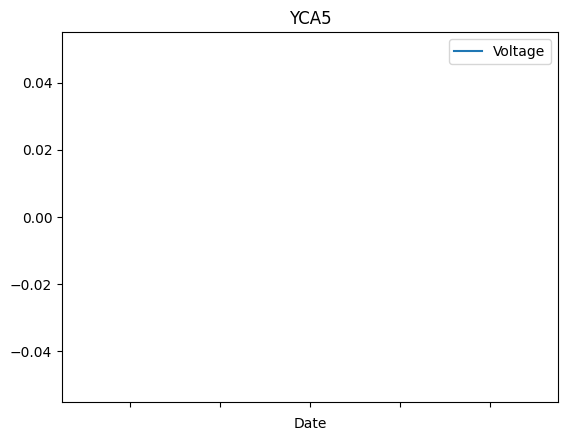

<Figure size 640x480 with 0 Axes>

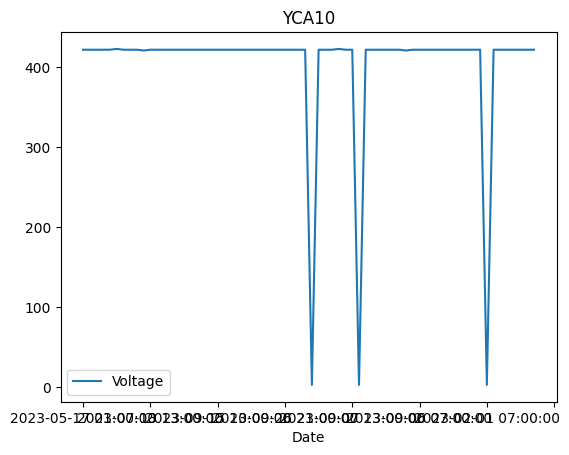

<Figure size 640x480 with 0 Axes>

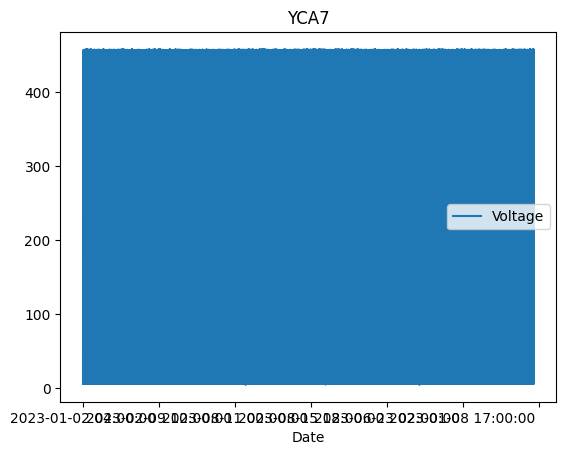

<Figure size 640x480 with 0 Axes>

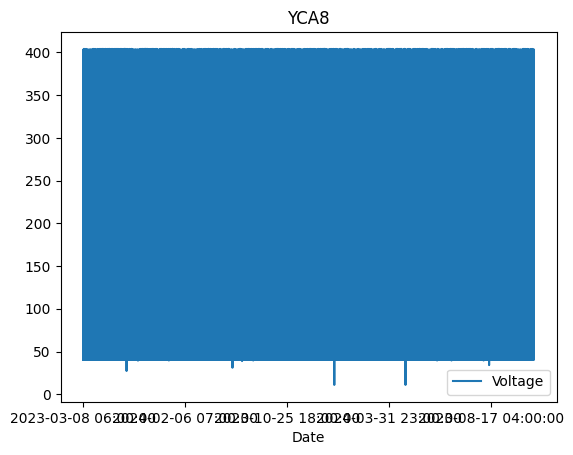

<Figure size 640x480 with 0 Axes>

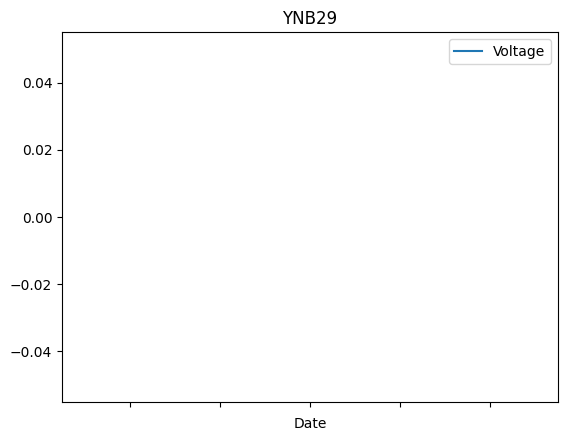

<Figure size 640x480 with 0 Axes>

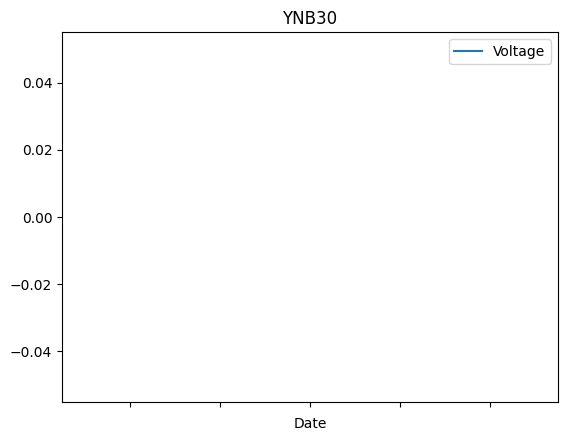

<Figure size 640x480 with 0 Axes>

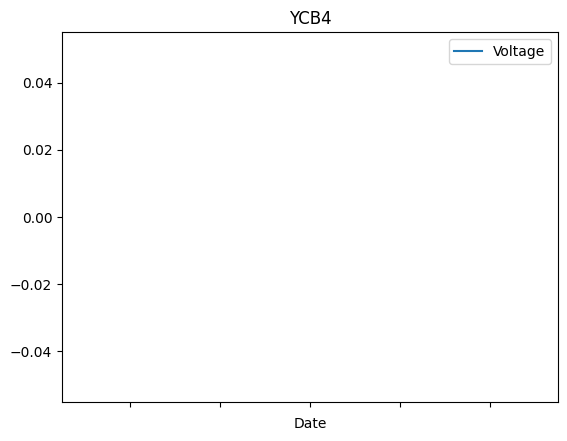

<Figure size 640x480 with 0 Axes>

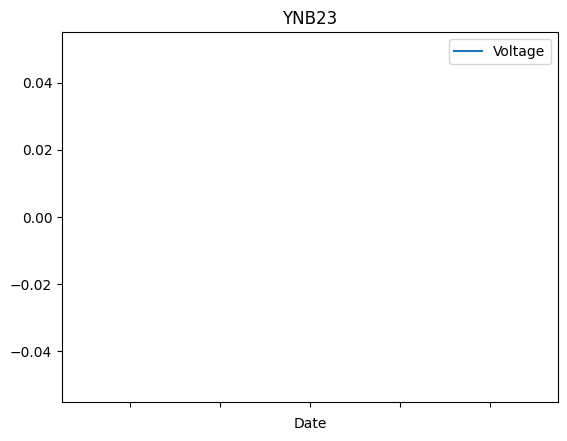

<Figure size 640x480 with 0 Axes>

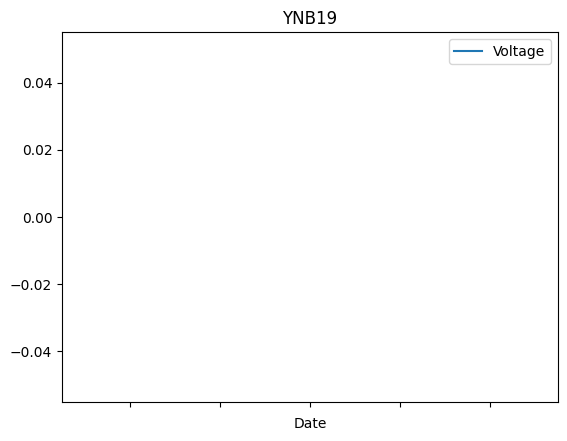

<Figure size 640x480 with 0 Axes>

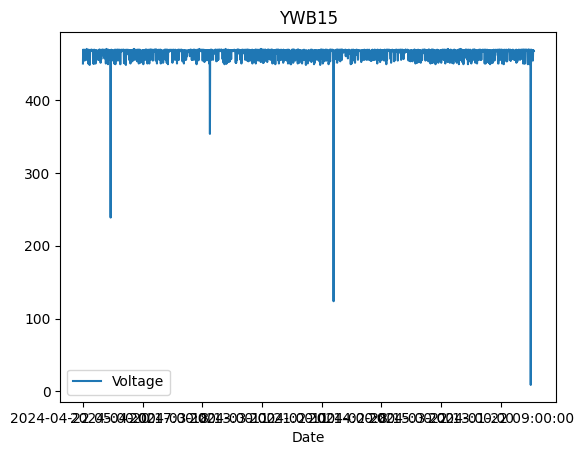

<Figure size 640x480 with 0 Axes>

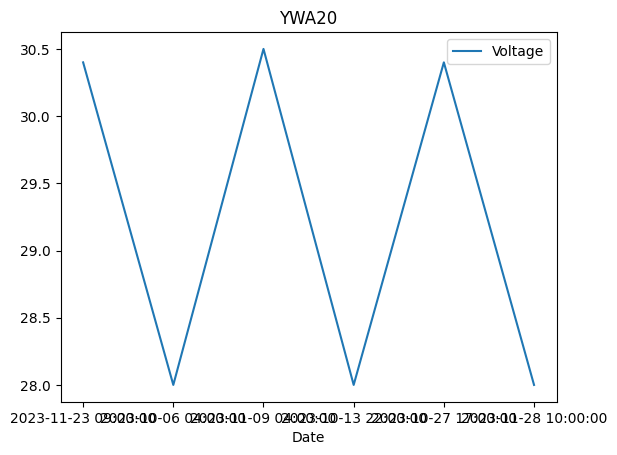

<Figure size 640x480 with 0 Axes>

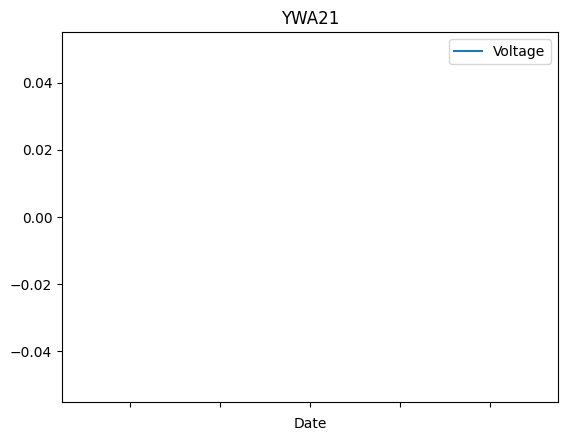

<Figure size 640x480 with 0 Axes>

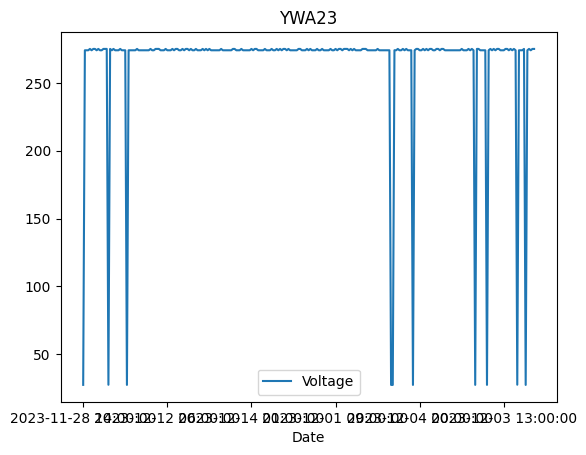

<Figure size 640x480 with 0 Axes>

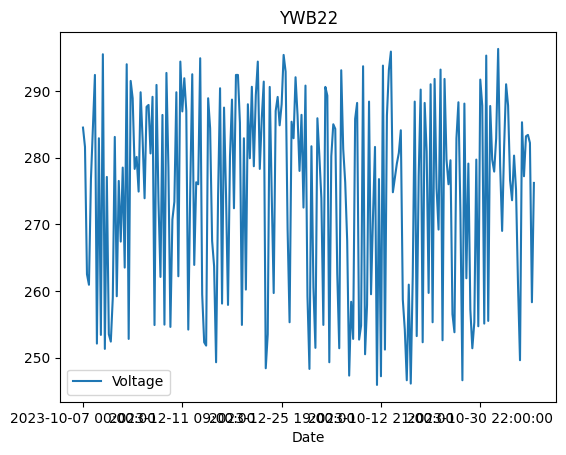

<Figure size 640x480 with 0 Axes>

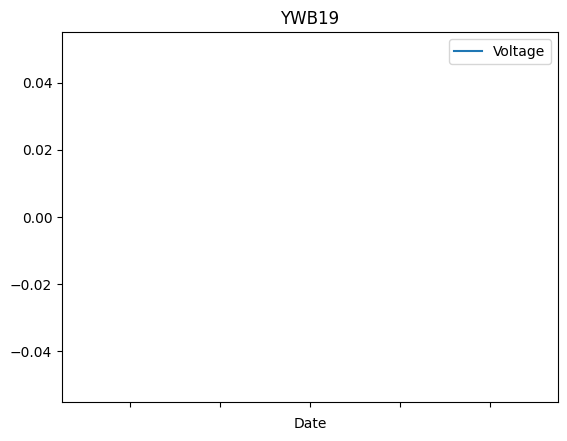

<Figure size 640x480 with 0 Axes>

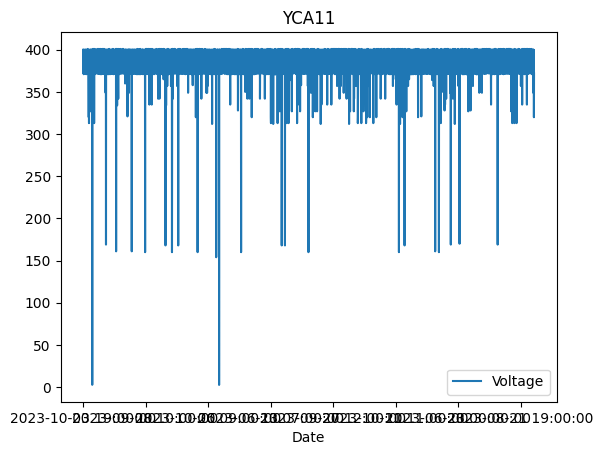

<Figure size 640x480 with 0 Axes>

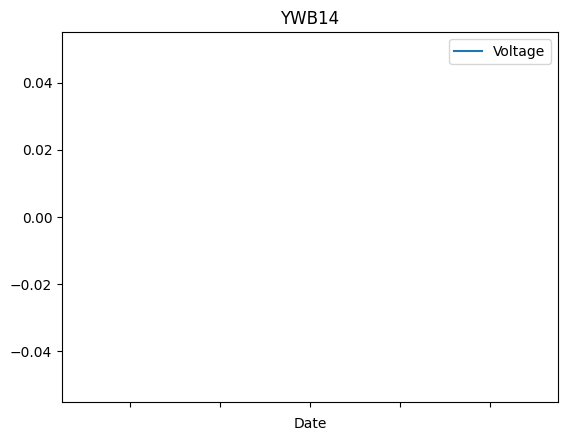

<Figure size 640x480 with 0 Axes>

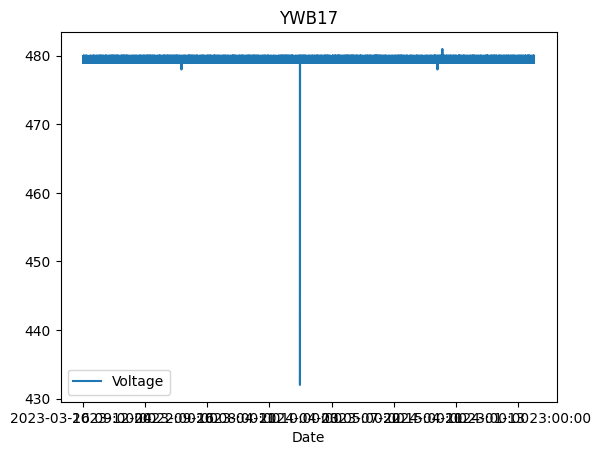

<Figure size 640x480 with 0 Axes>

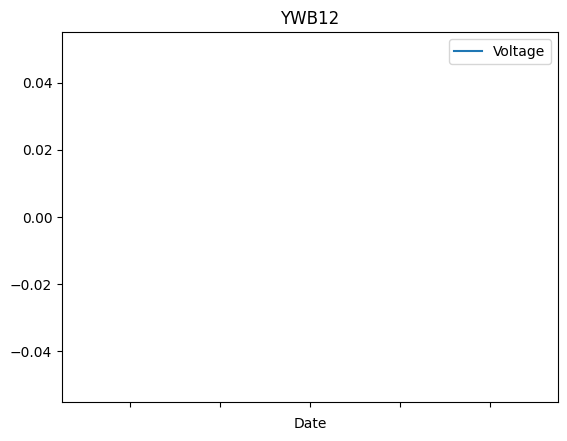

In [57]:
plot_voltage(train,dict_data_tab0)

In [58]:
#plot each well_id in dict_data_tab0 where the plot is Voltage in time series
def plot_pressure_discharge(train,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        train[train['Well_ID']==key].plot(x='Date',y='Pressure_Discharge')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

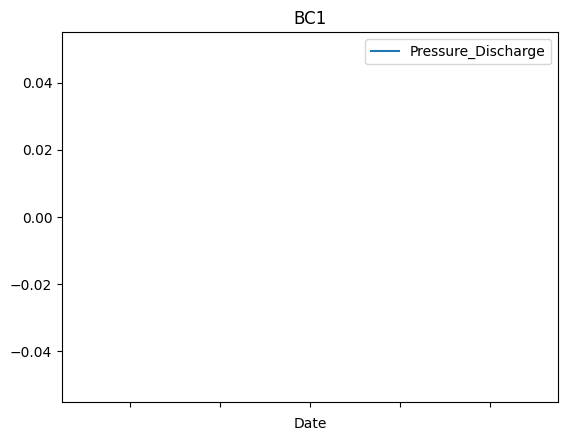

<Figure size 640x480 with 0 Axes>

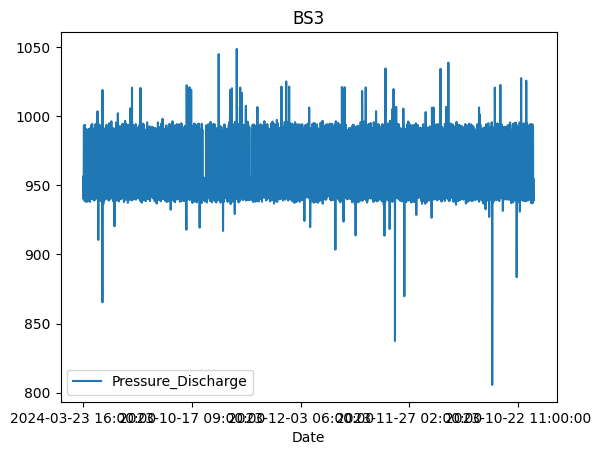

<Figure size 640x480 with 0 Axes>

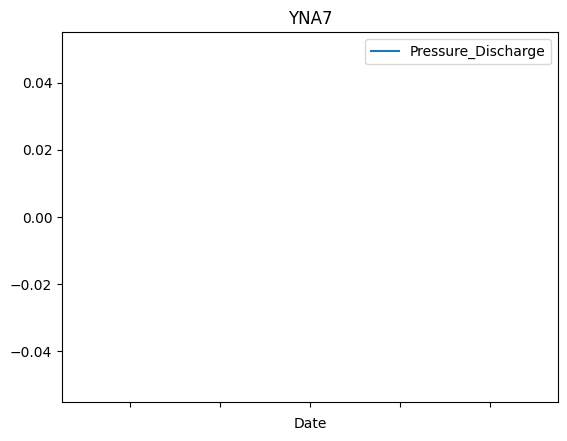

<Figure size 640x480 with 0 Axes>

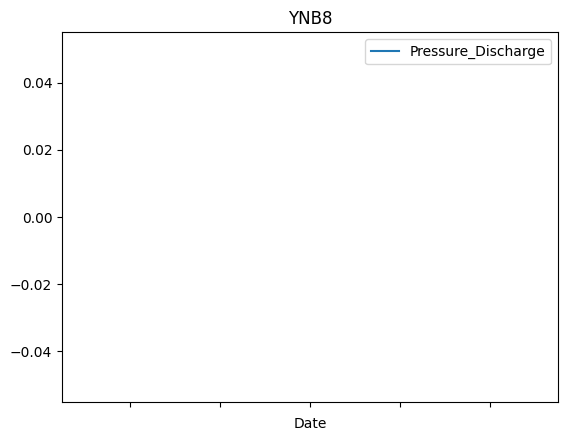

<Figure size 640x480 with 0 Axes>

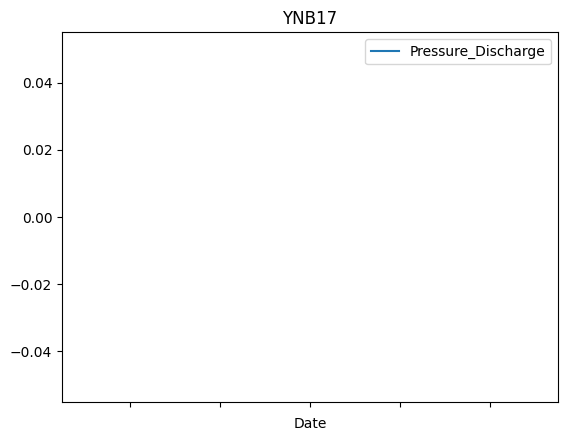

<Figure size 640x480 with 0 Axes>

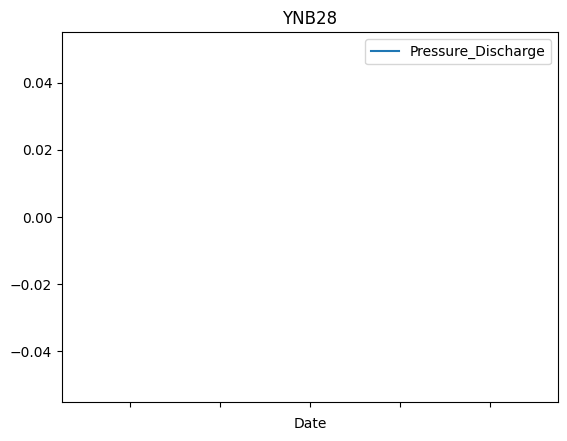

<Figure size 640x480 with 0 Axes>

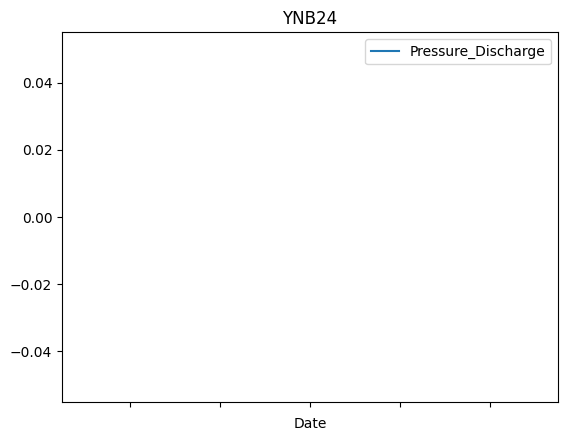

<Figure size 640x480 with 0 Axes>

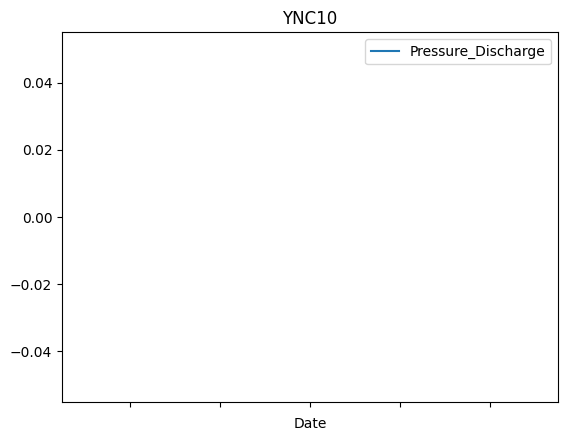

<Figure size 640x480 with 0 Axes>

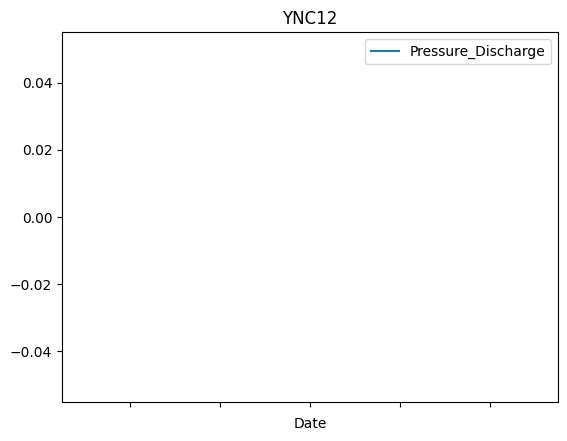

<Figure size 640x480 with 0 Axes>

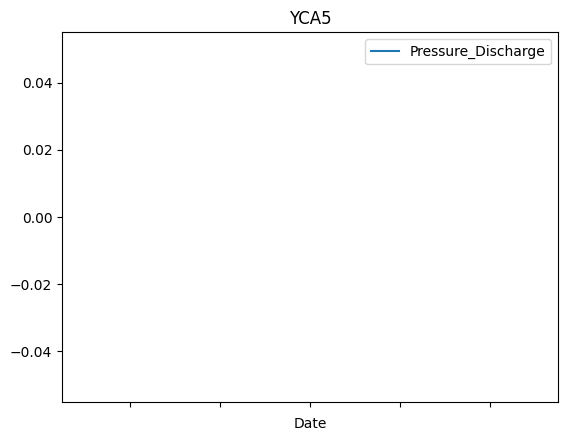

<Figure size 640x480 with 0 Axes>

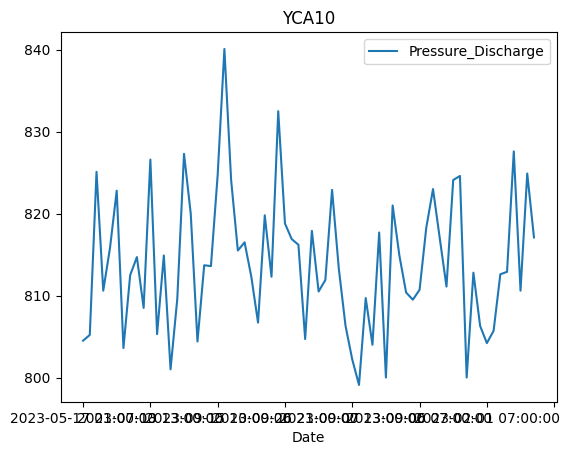

<Figure size 640x480 with 0 Axes>

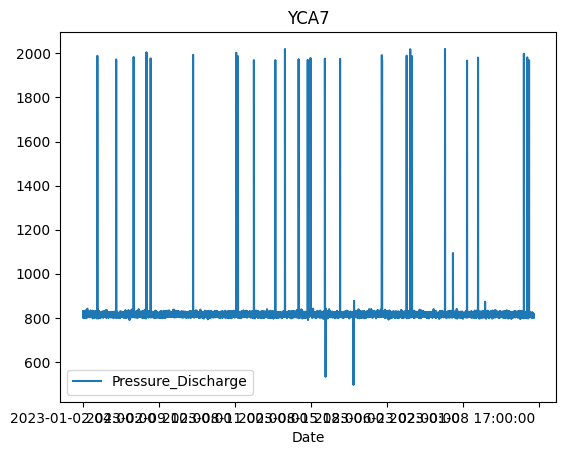

<Figure size 640x480 with 0 Axes>

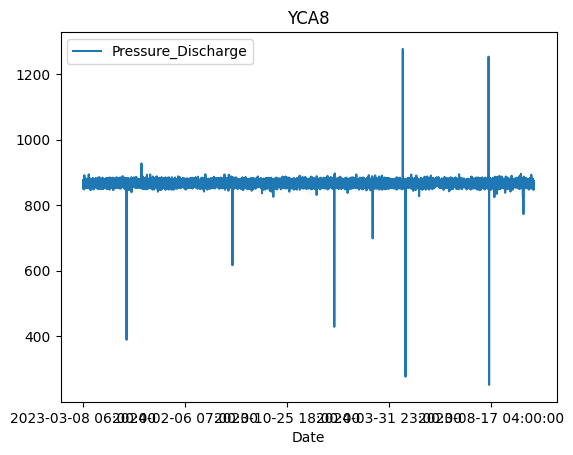

<Figure size 640x480 with 0 Axes>

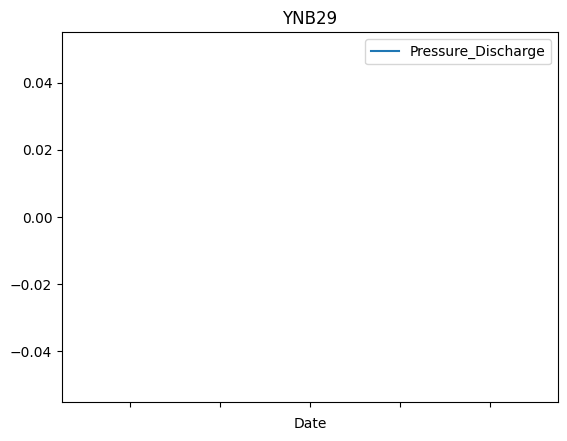

<Figure size 640x480 with 0 Axes>

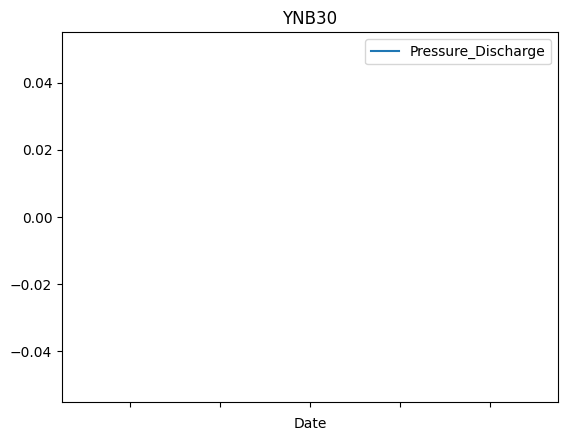

<Figure size 640x480 with 0 Axes>

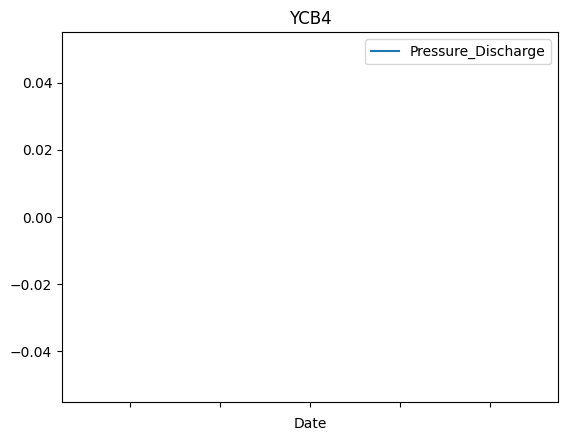

<Figure size 640x480 with 0 Axes>

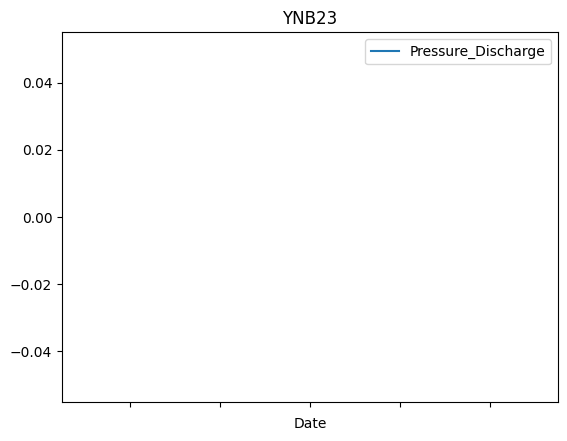

<Figure size 640x480 with 0 Axes>

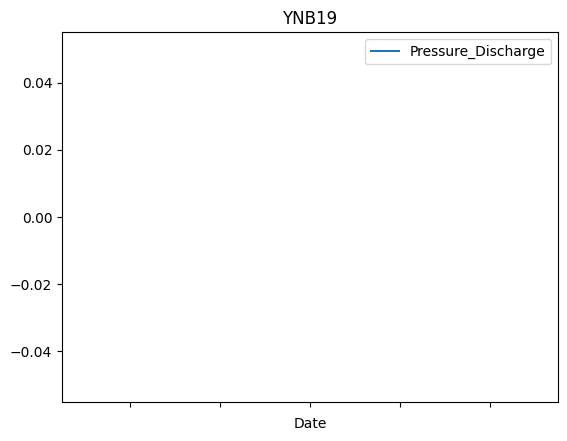

<Figure size 640x480 with 0 Axes>

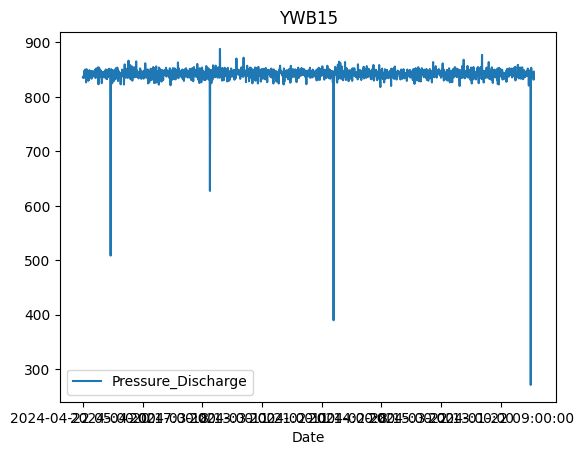

<Figure size 640x480 with 0 Axes>

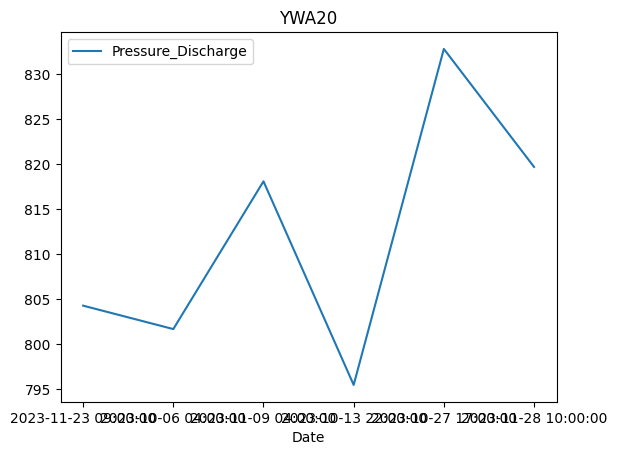

<Figure size 640x480 with 0 Axes>

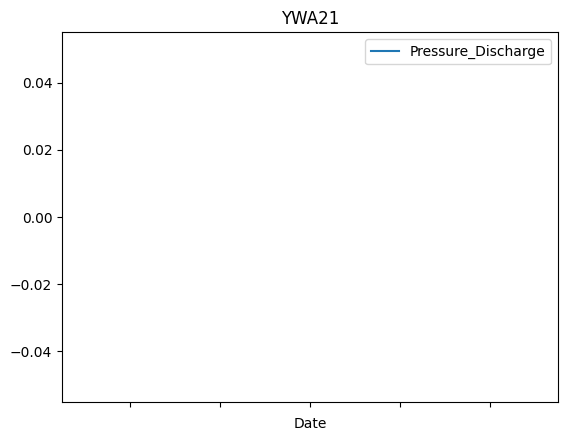

<Figure size 640x480 with 0 Axes>

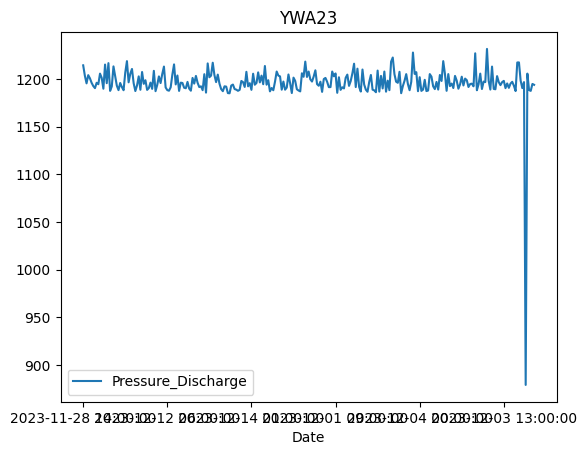

<Figure size 640x480 with 0 Axes>

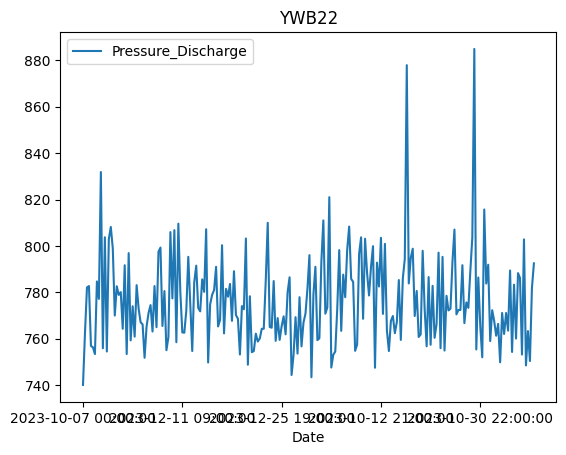

<Figure size 640x480 with 0 Axes>

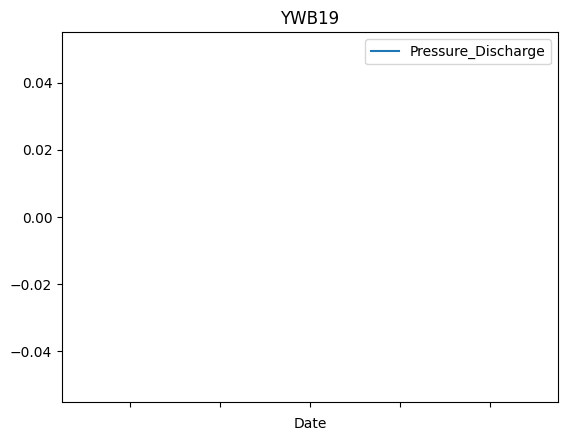

<Figure size 640x480 with 0 Axes>

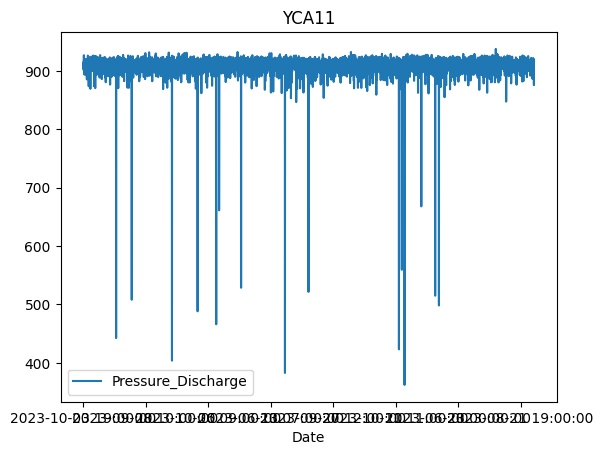

<Figure size 640x480 with 0 Axes>

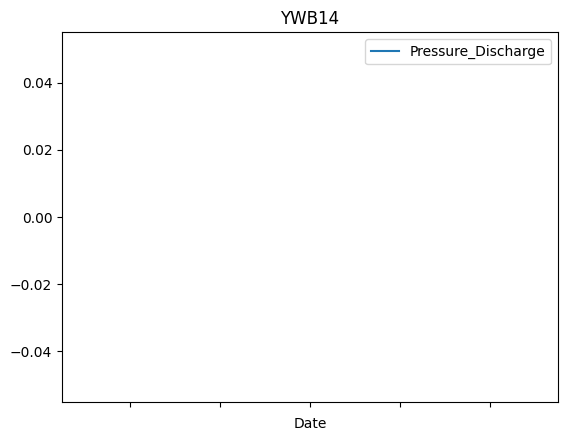

<Figure size 640x480 with 0 Axes>

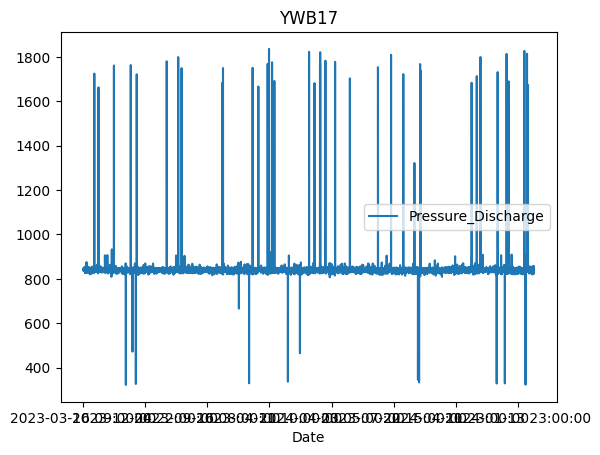

<Figure size 640x480 with 0 Axes>

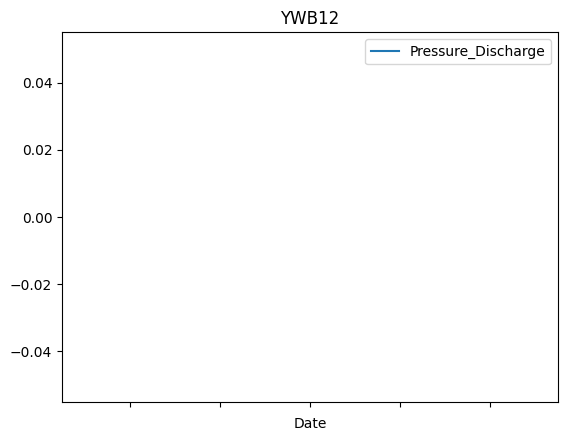

In [59]:
plot_pressure_discharge(train,dict_data_tab0)

In [60]:
#plot each well_id in dict_data_tab0 where the plot is Voltage in time series
def plot_pressure_intake(train,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        train[train['Well_ID']==key].plot(x='Date',y='Pressure_Intake')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

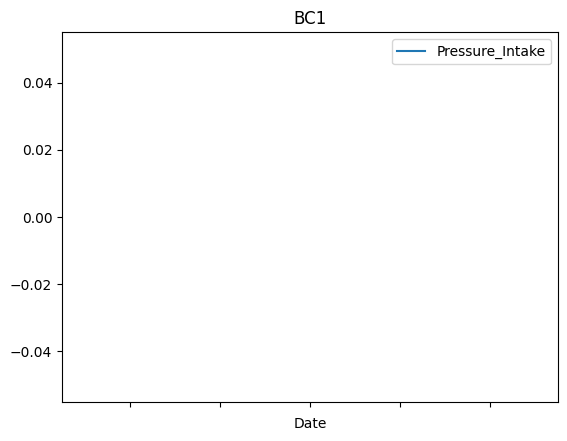

<Figure size 640x480 with 0 Axes>

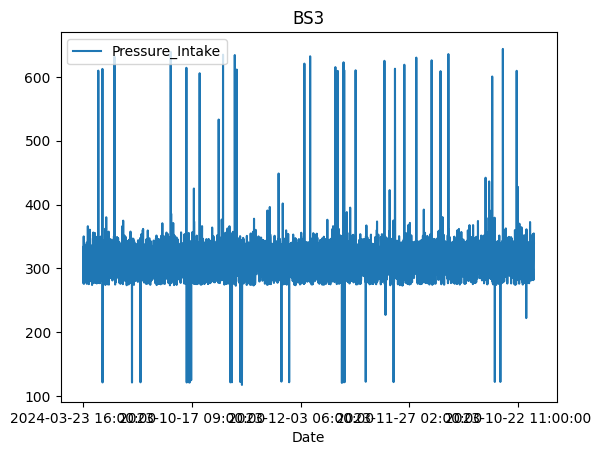

<Figure size 640x480 with 0 Axes>

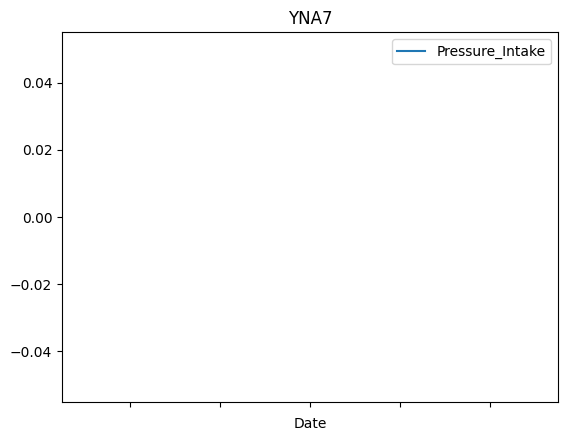

<Figure size 640x480 with 0 Axes>

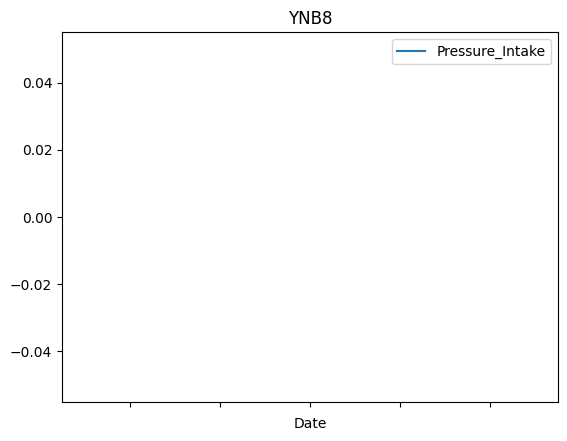

<Figure size 640x480 with 0 Axes>

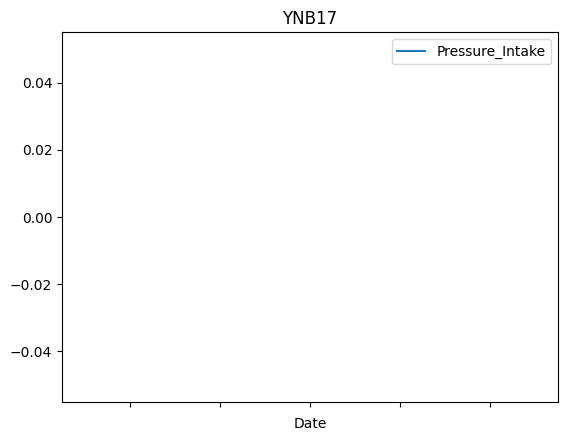

<Figure size 640x480 with 0 Axes>

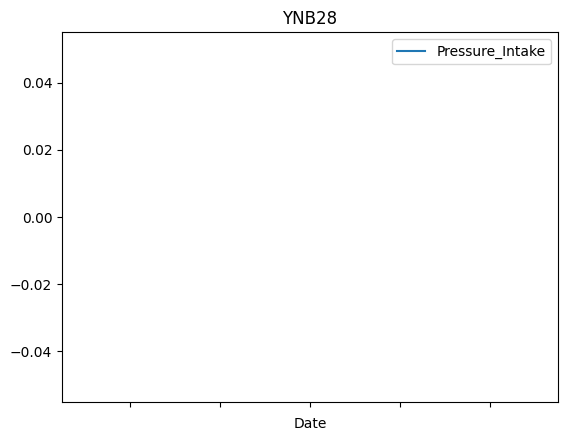

<Figure size 640x480 with 0 Axes>

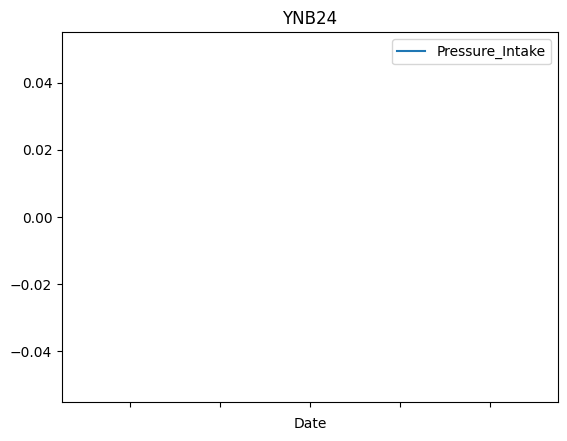

<Figure size 640x480 with 0 Axes>

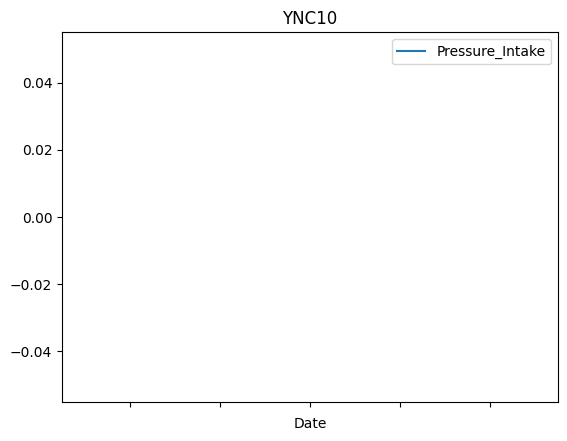

<Figure size 640x480 with 0 Axes>

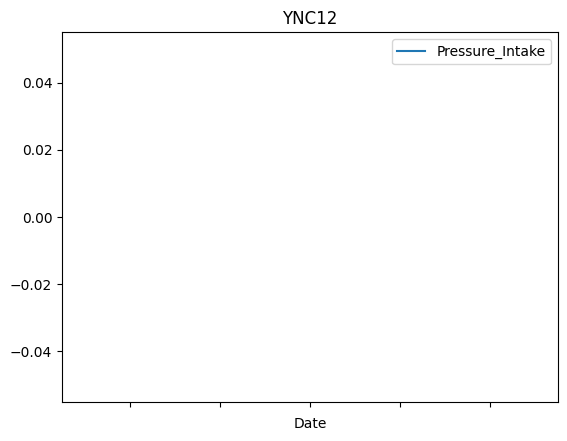

<Figure size 640x480 with 0 Axes>

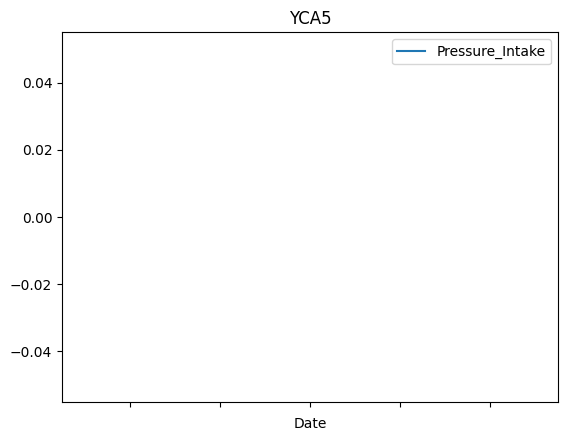

<Figure size 640x480 with 0 Axes>

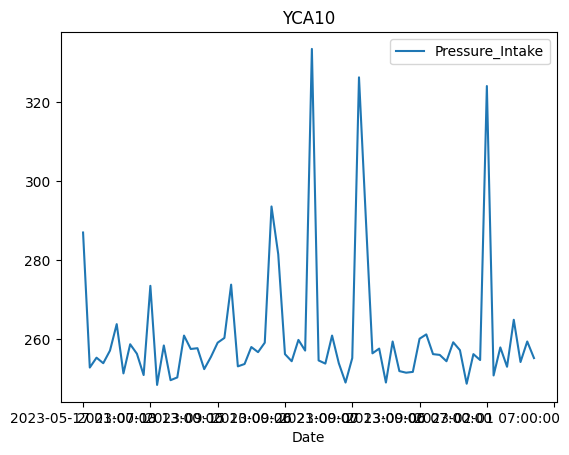

<Figure size 640x480 with 0 Axes>

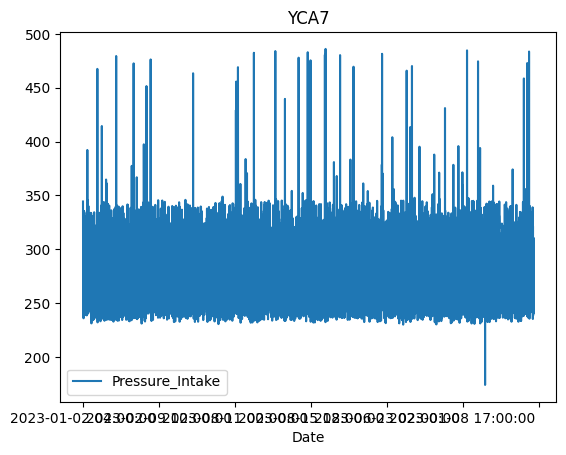

<Figure size 640x480 with 0 Axes>

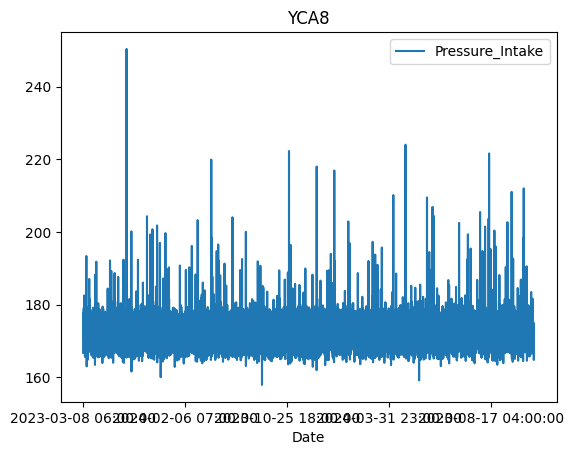

<Figure size 640x480 with 0 Axes>

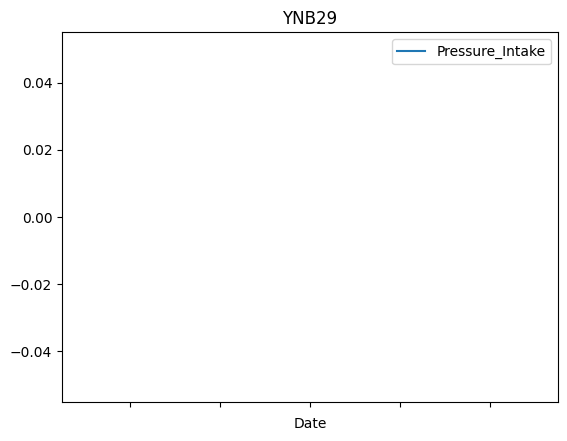

<Figure size 640x480 with 0 Axes>

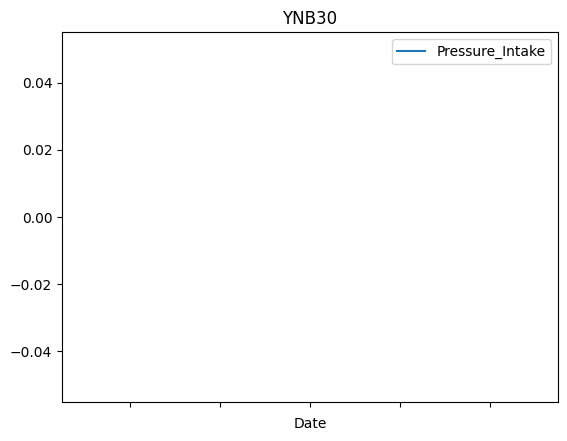

<Figure size 640x480 with 0 Axes>

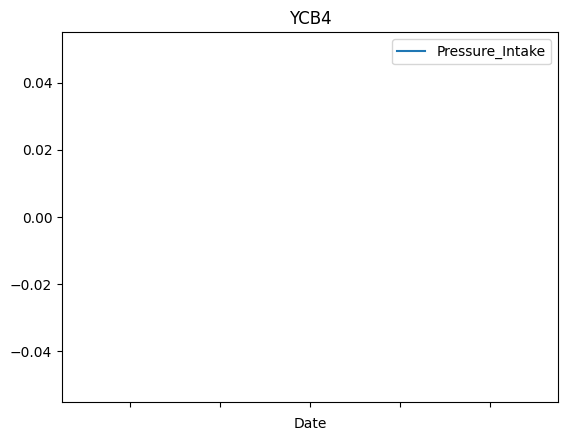

<Figure size 640x480 with 0 Axes>

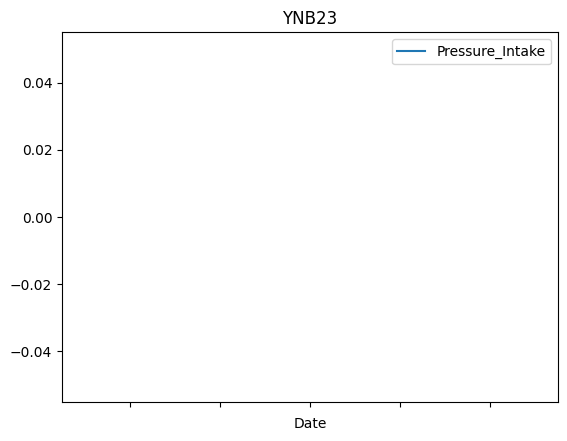

<Figure size 640x480 with 0 Axes>

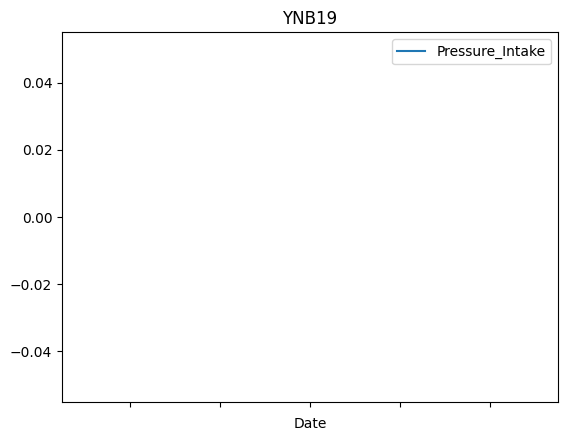

<Figure size 640x480 with 0 Axes>

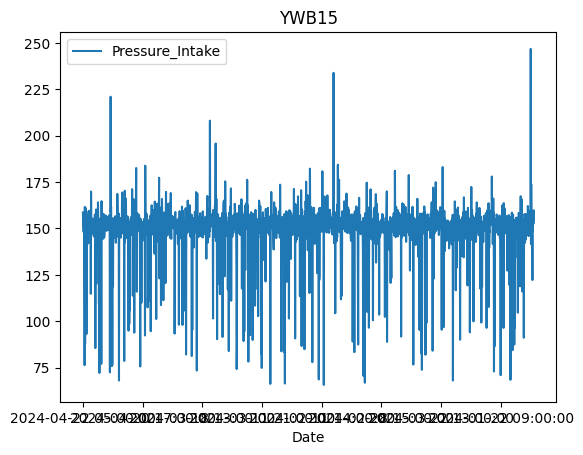

<Figure size 640x480 with 0 Axes>

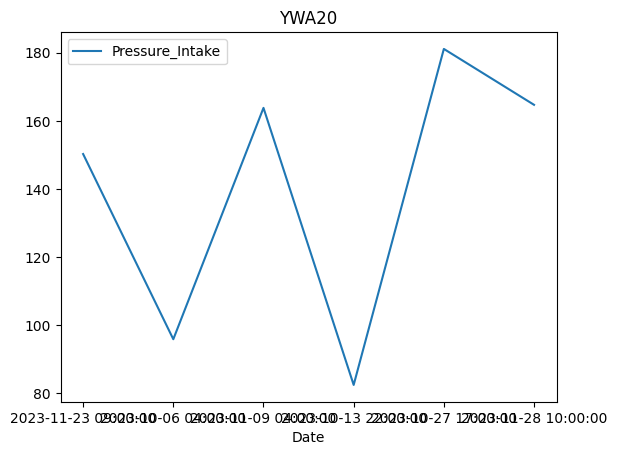

<Figure size 640x480 with 0 Axes>

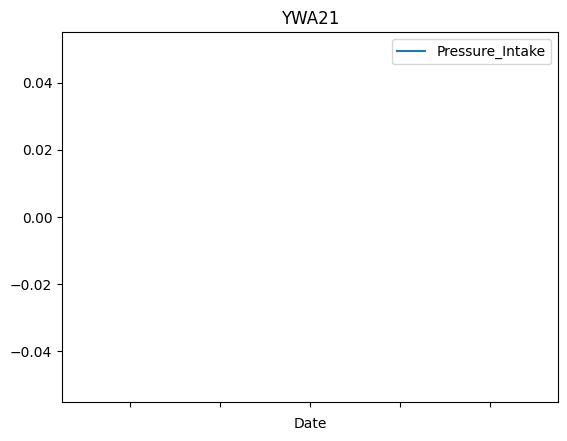

<Figure size 640x480 with 0 Axes>

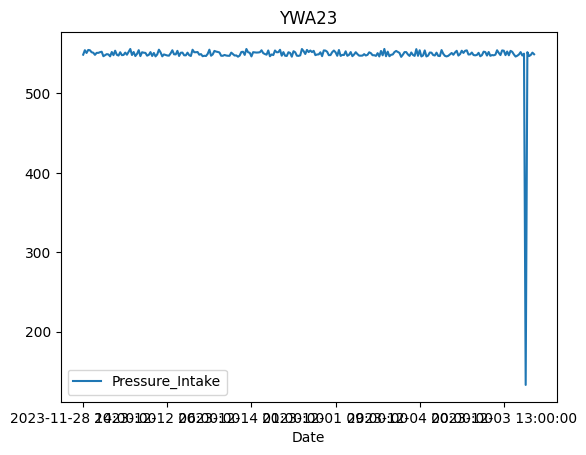

<Figure size 640x480 with 0 Axes>

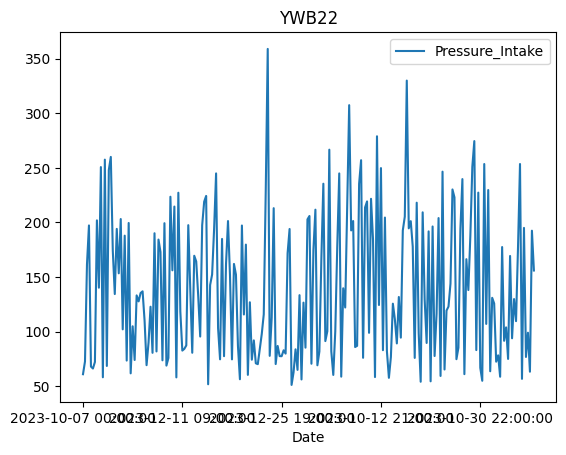

<Figure size 640x480 with 0 Axes>

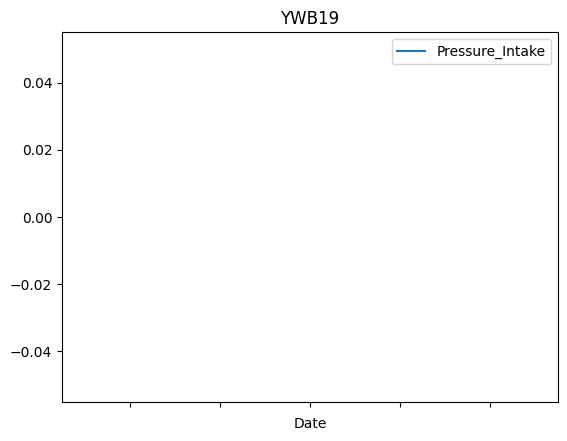

<Figure size 640x480 with 0 Axes>

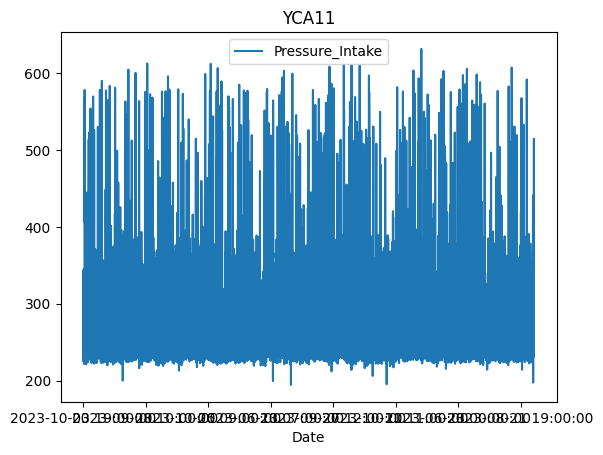

<Figure size 640x480 with 0 Axes>

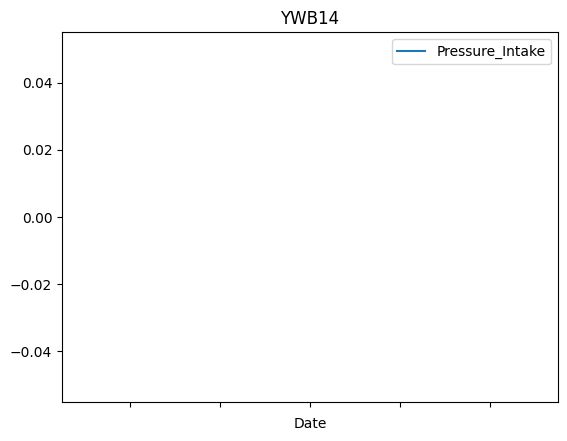

<Figure size 640x480 with 0 Axes>

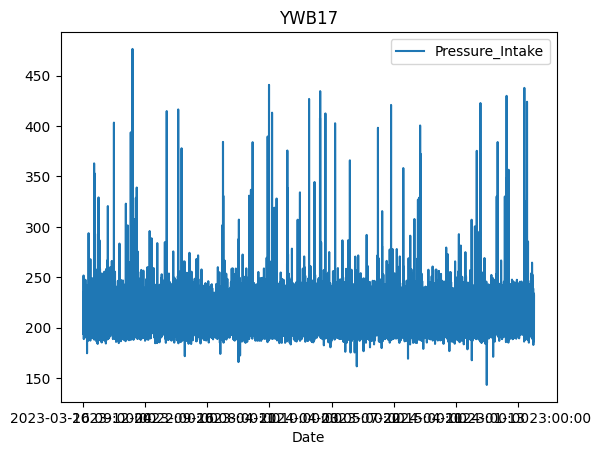

<Figure size 640x480 with 0 Axes>

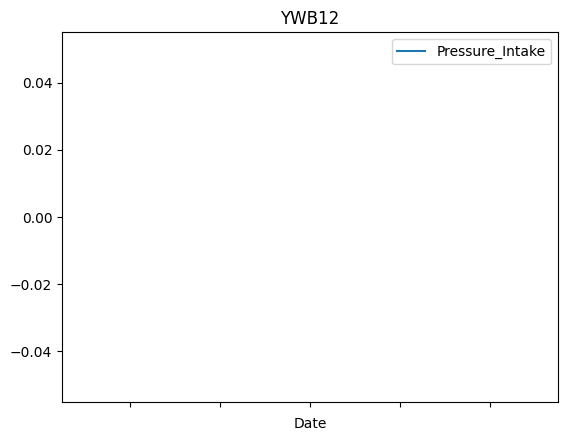

In [61]:
plot_pressure_intake(train,dict_data_tab0)